In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from utils.graph import Node, DAG, HillClimbing

In [3]:
import pandas as pd

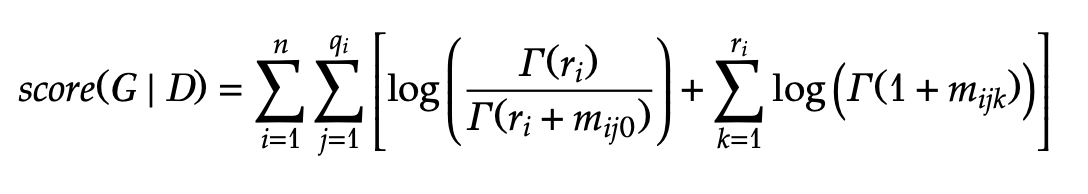
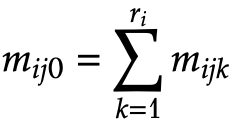

Our goal is to implement this function. Lets make sure we have everything defined:
- G = the graph
- D = the data
- n = the number of variables
- q_i = the number of possible values of the parents of Xi, which is 2^k if there are k parents and all our variables are binary
- r_i = the number of possible values our Xi variable can take
- m_ijk = the number of times in our data that the variable Xi takes the value k, and the parents of Xi take the jth configuration instantation 

In [4]:
def connect_nodes_from_edge_list(node_list, edge_list):
    for edge in edge_list:
        node_name = edge[1]
        parent_name = edge[0]
        child = None
        parent = None
        for node in node_list:
            if (node.variable == node_name):
                child = node
                break
        for node in node_list:
            if (node.variable == parent_name):
                parent = node
                break
        if (child != None and parent != None):
            child.add_prev(parent)
    return node_list

# Titanic Dataset

In [5]:
titanic_df = pd.read_csv("small.csv")

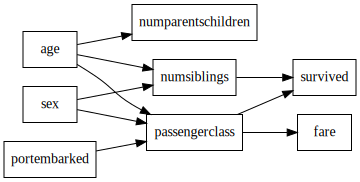

In [18]:
# Draw the hand picked Titanic data set

edge_list = [
    ('age','numparentschildren'),
    ('age','numsiblings'), 
    ('age','passengerclass'),
    ('sex','passengerclass'),
    ('sex','numsiblings'),
    ('passengerclass','fare'),
    ('passengerclass','survived'),
    ('portembarked','passengerclass'),
    ('numsiblings','survived')
]

hand_made_dag = DAG(nodes=connect_nodes_from_edge_list([Node(variable=col, prev=[]) for col in titanic_df.columns], edge_list=edge_list), randomize=False)
hand_made_dag.draw_dot_from_digraph()

In [22]:
# Compare the output of our two score functions
print(f"Slow score function: {hand_made_dag.bayesian_dirichilet_score(titanic_df)}")
print(f"Fast score function {hand_made_dag.bayesian_dirichilet_score_fast(titanic_df)}")

Slow score function: -4032.6119571830086
Fast score function -4032.6119571830086


-4032.6119571830086
-3820.285740305114


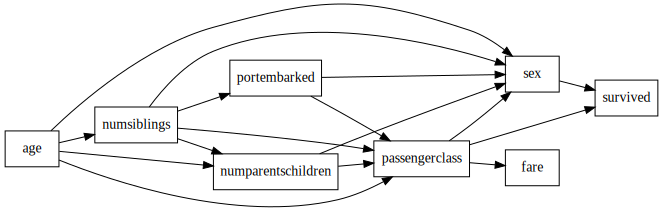

In [15]:
# Train our handmade DAG for 1000 iterations
print(hand_made_dag.bayesian_dirichilet_score_fast(titanic_df))
searcher = HillClimbing(hand_made_dag, titanic_df, max_iteration=1000)
best_handmade, best_handmade_score = searcher.solve()
print(best_handmade_score)
best_handmade.draw_dot_from_digraph()

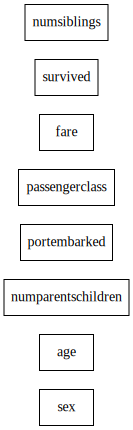

In [11]:
empty_nodes = [Node(variable=col, prev=[]) for col in titanic_df.columns]
empty_graph = DAG(nodes=empty_nodes, randomize=False)
empty_graph.draw_dot_from_digraph()

In [24]:
empty_graph.bayesian_dirichilet_score_fast(titanic_df)

-4166.225858784904

In [25]:
empty_graph.bayesian_dirichilet_score(titanic_df)

-4166.225858784904

-4166.225858784904
-3799.4840101250174


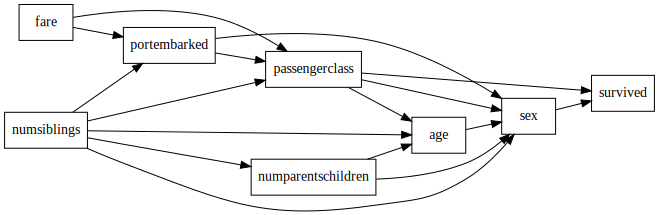

In [26]:
print(empty_graph.bayesian_dirichilet_score_fast(titanic_df))
searcher = HillClimbing(empty_graph, titanic_df, max_iteration=1000)
best_from_empty, best_from_empty_score = searcher.solve()
print(best_from_empty_score)
best_from_empty.draw_dot_from_digraph()

# Wine Dataset

In [6]:
wine_df = pd.read_csv("medium.csv")
wine_df.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'ph',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

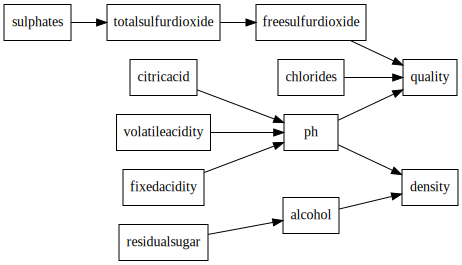

In [31]:

edge_list = [
    ('fixedacidity','ph'),
    ('volatileacidity','ph'), 
    ('citricacid','ph'),
    ('ph','quality'),
    ('ph','density'),
    ('residualsugar','alcohol'),
    ('alcohol','density'),
    ('denisty','quality'),
    ('sulphates','totalsulfurdioxide'),
    ('totalsulfurdioxide','freesulfurdioxide'),
    ('freesulfurdioxide','quality'),
    ('chlorides','quality')
]

hand_made_dag = DAG(nodes=connect_nodes_from_edge_list([Node(variable=col, prev=[]) for col in wine_df.columns], edge_list=edge_list), randomize=False)
hand_made_dag.draw_dot_from_digraph()

-44049.382151591904
-42193.37254565337


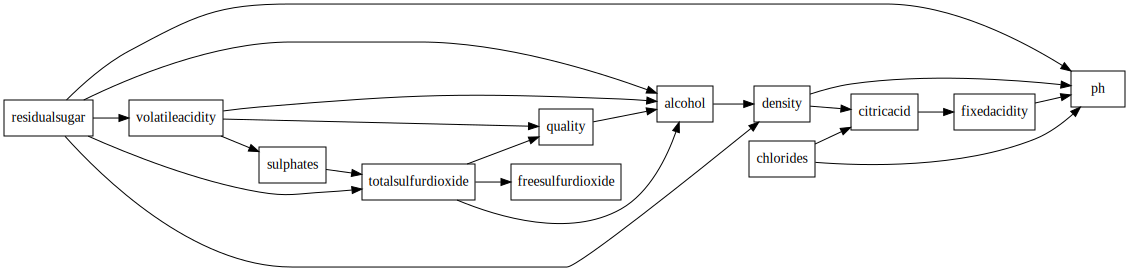

In [39]:
print(hand_made_dag.bayesian_dirichilet_score_fast(wine_df))
searcher = HillClimbing(hand_made_dag, wine_df, max_iteration=2000)
best_handmade, best_handmade_score = searcher.solve()
print(best_handmade_score)
best_handmade.draw_dot_from_digraph()

In [42]:
best_handmade_score

-42193.37254565337

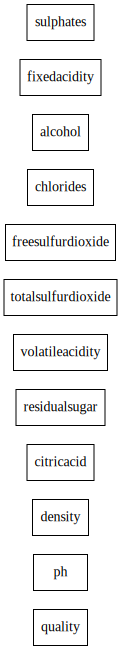

In [33]:
empty_nodes = [Node(variable=col, prev=[]) for col in wine_df.columns]
empty_graph = DAG(nodes=empty_nodes, randomize=False)
empty_graph.draw_dot_from_digraph()

-45367.62511363246
-41919.15747211693


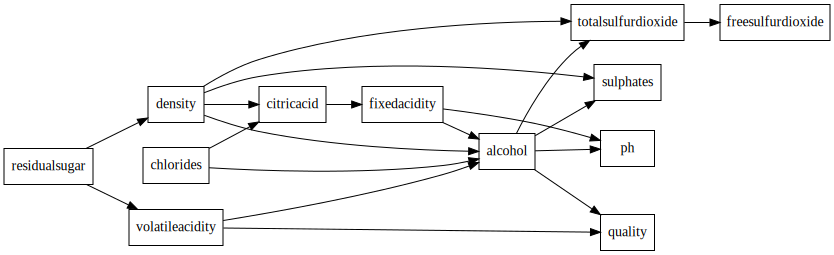

In [34]:
print(empty_graph.bayesian_dirichilet_score_fast(wine_df))
searcher = HillClimbing(empty_graph, wine_df, max_iteration=2000)
best_handmade, best_handmade_score = searcher.solve()
print(best_handmade_score)
best_handmade.draw_dot_from_digraph()

In [7]:
empty_titanic = -4166.225858784904
handmade_titanic = -4032.6119571830086
trained_handmade_titanic = -3820.285740305114
trained_empty_titanic = -3799.4840101250174

titanic_scores = [empty_titanic, handmade_titanic, trained_handmade_titanic, trained_empty_titanic]

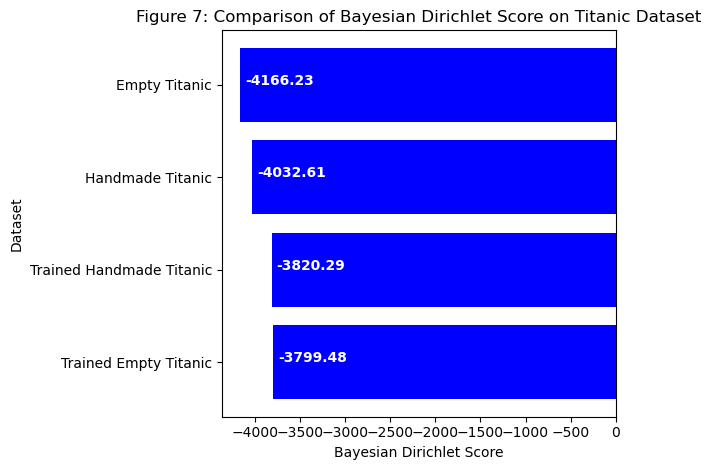

In [13]:
import matplotlib.pyplot as plt

data = [empty_titanic, handmade_titanic, trained_handmade_titanic, trained_empty_titanic]
labels = ['Empty Titanic', 'Handmade Titanic', 'Trained Handmade Titanic', 'Trained Empty Titanic']

fig, ax = plt.subplots()
ax.barh(labels, data, align='center', color='b')
ax.invert_yaxis()
ax.set_title('Figure 7: Comparison of Bayesian Dirichlet Score on Titanic Dataset')
ax.set_xlabel('Bayesian Dirichlet Score')
ax.set_ylabel('Dataset')
for i, v in enumerate(data):
    ax.text(v + 50, i, str(round(v, 2)), color='white', fontweight='bold')
fig.tight_layout()
plt.show()

In [15]:
empty_wine = -45367.62511363246
handmade_wine = -44049.382151591904
trained_handmade_wine = -42193.37254565337
trained_empty_wine = -41919.15747211693



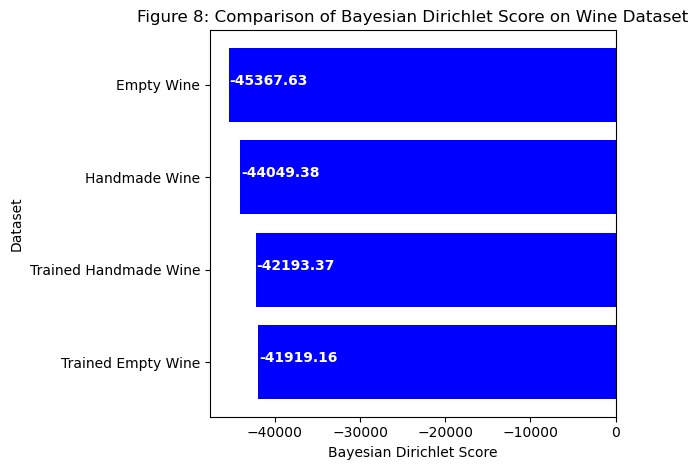

In [17]:
data = [empty_wine, handmade_wine, trained_handmade_wine, trained_empty_wine]
labels = ['Empty Wine', 'Handmade Wine', 'Trained Handmade Wine', 'Trained Empty Wine']

fig, ax = plt.subplots()
ax.barh(labels, data, align='center', color='b')
ax.invert_yaxis()
ax.set_title('Figure 8: Comparison of Bayesian Dirichlet Score on Wine Dataset')
ax.set_xlabel('Bayesian Dirichlet Score')
ax.set_ylabel('Dataset')
for i, v in enumerate(data):
    ax.text(v + 50, i, str(round(v, 2)), color='white', fontweight='bold')
fig.tight_layout()
plt.show()

# Analysis

In [47]:
def test_independence_in_causal_chain(data, variable, variable_value, known_variables:list((str,int)), variables_for_test: list((str, int))):
    # We want to check if P(var = val | K = k) = P(var = val | K = k and test) which would show conditional independence
    
    # First we calculate P(var = val | K = k)
    base_string_known_variables = ""
    i = 0
    for (key,value) in known_variables:
        base_string_known_variables += f"{key} == {value}"
        if (i < len(known_variables)):
            base_string_known_variables += '&'

    known_value_proportion = len(data.query(base_string_known_variables)) / len(data)

    query_string = base_string_known_variables + f"{variable} == {variable_value}"
    conditional_proportion = len(data.query(query_string)) / len(data)
    p_D_C = conditional_proportion / known_value_proportion

    # Now we calculate the other side
    base_string = ""
    for (key,value) in variables_for_test:
        base_string += f"{key} == {value}"
    query_string = base_string + '&' + base_string_known_variables + f"& {variable} == {variable_value}"
    p_ABCD = len(data.query(query_string)) / len(data)

    query_string = base_string +'&' +  base_string_known_variables
    p_ABC = len(data.query(query_string)) / len(data)

    p_D_ABC = p_ABCD / p_ABC

    return p_D_C, p_D_ABC

In [48]:
with_known_var, with_all_vars = test_independence_in_causal_chain(
    titanic_df, 
    'survived',
    1,
    [
        ('sex', 1),
        ('passengerclass', 1),
    ],
    [
        ('portembarked', 1),
        ('fare', 1),
    ]
)

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [44]:
with_known_var

0.8110918544194108

In [45]:
with_all_vars

0.7916666666666667

In [32]:
titanic_correlation = titanic_df.corr(method='spearman')
titanic_correlation

age  portembarked      fare  numparentschildren  \
age                 1.000000      0.096385 -0.012425           -0.156192   
portembarked        0.096385      1.000000  0.091886           -0.081794   
fare               -0.012425      0.091886  1.000000            0.119428   
numparentschildren -0.156192     -0.081794  0.119428            1.000000   
passengerclass      0.147791     -0.108077  0.100900           -0.021826   
sex                -0.082587      0.122561  0.078873            0.203816   
numsiblings        -0.172000     -0.089432  0.066127            0.376282   
survived           -0.046012      0.137869  0.099439            0.054502   

                    passengerclass       sex  numsiblings  survived  
age                       0.147791 -0.082587    -0.172000 -0.046012  
portembarked             -0.108077  0.122561    -0.089432  0.137869  
fare                      0.100900  0.078873     0.066127  0.099439  
numparentschildren       -0.021826  0.203816     0.376282  0.054502  
passengerclass            1.000000  0.125163    -0.166268  0.276360  
sex                       0.125163  1.000000     0.051551  0.541585  
numsiblings              -0.166268  0.051551     1.000000 -0.111242  
survived                  0.276360  0.541585    -0.111242  1.000000

In [33]:
titanic_correlation['fare'].sort_values()

age                  -0.012425
numsiblings           0.066127
sex                   0.078873
portembarked          0.091886
survived              0.099439
passengerclass        0.100900
numparentschildren    0.119428
fare                  1.000000
Name: fare, dtype: float64

In [7]:
data = titanic_df

variable = 'survived'
parents = ['passengerclass', 'portembarked']

def collect_state_names(variable):
            states = sorted(list(data.loc[:, variable].dropna().unique()))
            return states

state_names = {
    var: collect_state_names(var) for var in data.columns
}

configurations = data.groupby([variable] + parents).size().unstack(parents)

parents_states = [state_names[parent] for parent in parents]

if len(parents_states) == 0:
    state_count_data = data.loc[:, variable].value_counts()

    state_counts = (
        state_count_data.reindex(state_names[variable])
        .fillna(0)
        .to_frame()
    )
else:
    if not isinstance(configurations.columns, pd.MultiIndex):
        configurations.columns = pd.MultiIndex.from_arrays(
            [configurations.columns]
        )
    row_index = state_names[variable]
    column_index = pd.MultiIndex.from_product(parents_states, names=parents)
    state_counts = configurations.reindex(
        index=row_index, columns=column_index
    ).fillna(0)

state_counts

passengerclass    1           2          3      
portembarked      1   2   3   1   2  3   1  2  3
survived                                        
1               286  41  45  53  26  1  88  8  1
2                67  25  27  74  59  1  76  9  2

In [15]:
# proportion of passengerclass == 1
target_value_proportion = len(titanic_df[titanic_df['passengerclass'] == 1]) / len(titanic_df)

In [16]:
# proportion of survived == 1 and passengerclass == 1
mask = (titanic_df['survived'] == 1) & (titanic_df['passengerclass'] == 1)
conditional_proportion = len(titanic_df[mask]) / len(titanic_df)

In [17]:
# P(survived == 1 | passengerclass == 1)
conditional_proportion / target_value_proportion

0.7576374745417516

In [19]:
# Now we need to calculate P(survived == 1 | passengerclass == 1 and portembarked == 1)
# P(survived == 1 and passengerclass == 1 and portembarked == 1)
mask = (titanic_df['survived'] == 1) & (titanic_df['passengerclass'] == 1) & (titanic_df['portembarked'] == 1)
total_proportion = len(titanic_df[mask])
total_proportion

286

In [20]:
mask = (titanic_df['passengerclass'] == 1) & (titanic_df['portembarked'] == 1)
y_a_proportion = len(titanic_df[mask])
y_a_proportion

353

In [21]:
total_proportion/y_a_proportion

0.8101983002832861

In [55]:
# survived = 1? if portembarked = 1, what if passengerclass = ?
counts_array  = np.asarray(state_counts)
counts_array

array([[286,  41,  45,  53,  26,   1,  88,   8,   1],
       [ 67,  25,  27,  74,  59,   1,  76,   9,   2]])

In [61]:
counts_array.sum(axis=0)

array([353,  66,  72, 127,  85,   2, 164,  17,   3])

In [62]:
# Number of instances of Passengerclass = 1
353 + 66 + 72

491

In [39]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

# generate data
data = titanic_df
edge_list = [
    ('fare', 'portembarked'),
('fare', 'passengerclass'),
('numsiblings', 'portembarked'),
('numsiblings', 'passengerclass'),
('numsiblings', 'age'),
('numsiblings', 'numparentschildren'),
('numsiblings', 'sex'),
('portembarked', 'passengerclass'),
('portembarked', 'sex'),
('passengerclass', 'survived'),
('passengerclass', 'sex'),
('passengerclass', 'age'),
('numparentschildren', 'age'),
('numparentschildren', 'sex'),
('age', 'sex'),
('sex', 'survived'),
]
model = BayesianModel(edge_list)

model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5


/Users/ellington/opt/anaconda3/envs/bn-learner/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


+---------+------------+
| fare(1) | 0.9739     |
+---------+------------+
| fare(2) | 0.0208799  |
+---------+------------+
| fare(3) | 0.00521999 |
+---------+------------+
+-----------------+-----+--------------------+
| fare            | ... | fare(3)            |
+-----------------+-----+--------------------+
| numsiblings     | ... | numsiblings(3)     |
+-----------------+-----+--------------------+
| portembarked(1) | ... | 0.3333333333333333 |
+-----------------+-----+--------------------+
| portembarked(2) | ... | 0.3333333333333333 |
+-----------------+-----+--------------------+
| portembarked(3) | ... | 0.3333333333333333 |
+-----------------+-----+--------------------+
+-------------------+-----+--------------------+
| fare              | ... | fare(3)            |
+-------------------+-----+--------------------+
| numsiblings       | ... | numsiblings(3)     |
+-------------------+-----+--------------------+
| portembarked      | ... | portembarked(3)    |
+-------------

/Users/ellington/opt/anaconda3/envs/bn-learner/lib/python3.10/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
